In [89]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e45df55c-a3d9-4455-9500-3eb63f0abac3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-11T17:45:19.001Z', 'error_code': 0, 'error_message': None, 'elapsed': 11, 'credit_count': 1, 'notice': None, 'total_count': 9866}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11771, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [90]:
import pandas as pd
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19766234.00000,19766234.00000,False,NaN,1,NaN,NaN,None,2024-10-11T17:42:00.000Z,62757.40085,32363216540.00296,12.41970,0.63311,4.45467,1.17095,8.66728,5.06685,7.01746,1240477470400.75659,56.85800,1317905417815.85010,None,2024-10-11T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-11 20:45:19.241755
1,1027,Ethereum,ETH,ethereum,9407,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120381664.74636,120381664.74636,True,NaN,2,NaN,NaN,None,2024-10-11T17:42:00.000Z,2450.59175,14536345386.94377,-6.71520,0.24336,2.69491,1.36806,3.87512,-8.41151,-22.29302,295006314822.12933,13.50640,295006314822.13000,None,2024-10-11T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-11 20:45:19.241755
2,825,Tether USDt,USDT,tether,100089,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119732254814.62129,121363587340.04301,True,NaN,3,NaN,NaN,None,2024-10-11T17:42:00.000Z,0.99963,54582840486.29150,4.45800,-0.01581,0.07857,-0.02438,-0.03661,-0.06467,-0.05340,119688301444.36836,5.48600,121319035112.25999,None,2024-10-11T17:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-11 20:45:19.241755
3,1839,BNB,BNB,bnb,2258,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145932075.04407,145932075.04407,False,NaN,4,NaN,NaN,None,2024-10-11T17:42:00.000Z,574.24832,1668339667.86285,6.46120,0.36216,2.65127,3.61229,8.16840,10.84966,8.07712,83801248372.12959,3.83550,83801248372.13000,None,2024-10-11T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-11 20:45:19.241755
4,5426,Solana,SOL,solana,757,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,469541930.86562,586271555.27675,True,NaN,5,NaN,NaN,None,2024-10-11T17:42:00.000Z,145.62343,1852544393.91293,6.55210,0.80400,5.51012,1.89769,10.00762,-1.04089,4.15334,68376308727.31345,3.12950,85374877570.02000,None,2024-10-11T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-11 20:45:19.241755
5,3408,USDC,USDC,usd-coin,22412,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34871511521.81361,34871511521.81361,False,NaN,6,NaN,NaN,None,2024-10-11T17:42:00.000Z,0.99984,5251312906.11321,-2.62070,-0.01627,-0.00201,-0.00437,-0.01450,-0.02261,-0.00872,34865866666.51758,1.59760,34865866666.52000,None,2024-10-11T17:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-11 20:45:19.241755
6,52,XRP,XRP,xrp,1404,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56645058199.00000,99987139355.00000,False,NaN,7,NaN,NaN,None,2024-10-11T17:42:00.000Z,0.53980,1016489499.56463,-16.12290,0.45168,0.62915,1.57874,0.74431,-5.91144,0.18358,30576743124.28991,1.40150,53979542252.16000,None,2024-10-11T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-11 20:45:19.241755
7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146324716383.70523,146324716383.70523,True,NaN,8,NaN,NaN,None,2024-10-11T17:42:00.000Z,0.11117,688089065.31332,-7.32390,1.14506,5.73523,2.41643,9.70498,4.05769,0.77688,16267219641.96328,0.74540,16267219641.96000,None,2024-10-11T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-

In [93]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df 

    if not os.path.isfile(r'C:\Users\s-DX2\Desktop\Data\my projects\API.csv'):
        df.to_csv(r'C:\Users\s-DX2\Desktop\Data\my projects\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\s-DX2\Desktop\Data\my projects\API.csv', mode = 'a', header=False)

In [95]:

import os 
from time import time
from time import sleep

#for i in range(333):
 #   api_runner()
 #   print('API Runner completed')
    #sleep(60) #sleep for 1 minute
#exit()

api_runner()
print('API Runner completed')

API Runner completed


In [96]:
df2 = pd.read_csv(r'C:\Users\s-DX2\Desktop\Data\my projects\API.csv')
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19765381.00000,19765381.00000,False,NaN,1,NaN,NaN,NaN,2024-10-09T18:35:00.000Z,61340.67115,25293056558.63652,-17.61900,-0.65952,-1.24413,0.31427,8.64978,2.02879,6.05181,1212421736118.43188,56.59300,1288154094195.65991,NaN,2024-10-09T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:36:49.499759
1,1,1027,Ethereum,ETH,ethereum,9393,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120379987.67888,120379987.67888,True,NaN,2,NaN,NaN,NaN,2024-10-09T18:34:00.000Z,2422.08815,13684903200.01411,-10.57570,-0.62069,-0.74531,0.55501,3.89529,-7.23452,-23.00006,291570941932.25354,13.60980,291570941932.25000,NaN,2024-10-09T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:36:49.499759
2,2,825,Tether USDt,USDT,tether,99918,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,119848153356.52142,121363587342.99319,True,NaN,3,NaN,NaN,NaN,2024-10-09T18:34:00.000Z,0.99915,48603924939.09446,-14.75940,-0.00251,-0.05641,-0.09439,-0.09686,-0.10543,-0.08302,119746742817.10760,5.58950,121260894506.16000,NaN,2024-10-09T18:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-09 21:36:49.499759
3,3,1839,BNB,BNB,bnb,2257,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145932201.19509,145932201.19509,False,NaN,4,NaN,NaN,NaN,2024-10-09T18:34:00.000Z,575.17092,1970592445.99088,-6.53770,-0.43524,-0.85150,5.94644,11.33473,10.61275,8.54426,83935958553.61980,3.91940,83935958553.62000,NaN,2024-10-09T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:36:49.499759
4,4,5426,Solana,SOL,solana,752,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,469376876.53678,586280643.83772,True,NaN,5,NaN,NaN,NaN,2024-10-09T18:34:00.000Z,140.94124,1572673657.56163,-22.68870,-0.13311,-1.49067,-2.26294,6.31903,-8.70363,1.75857,66154560508.99581,3.08910,82631122807.28999,NaN,2024-10-09T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:36:49.499759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,10,2010,Cardano,ADA,cardano,1267,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34961093448.08067,44995152754.38966,False,NaN,11,NaN,NaN,NaN,2024-10-11T17:42:00.000Z,0.35244,202615815.26654,-4.87290,0.76091,4.70796,0.00285,2.38018,3.27475,-18.96305,12321553238.89255,0.56480,15859626832.71000,NaN,2024-10-11T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-11 20:45:20.709417
86,11,5805,Avalanche,AVAX,avalanche,787,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,406589964.10249,446593064.10249,False,NaN,12,NaN,NaN,NaN,2024-10-11T17:42:00.000Z,26.91731,263405282.66313,-8.55410,0.26655,5.19214,2.45447,14.23183,26.38097,3.90196,10944306778.36075,0.50090,19266027813.17000,NaN,2024-10-11T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-11 20:45:20.709417
87,12,5994,Shiba Inu,SHIB,shiba-inu,883,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589267443954278.37500,589518356557422.75000,False,NaN,13,NaN,NaN,NaN,2024-10-11T17:43:00.000Z,0.00002,408263111

In [99]:
df2


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19765381.00000,19765381.00000,False,NaN,1,NaN,NaN,NaN,2024-10-09T18:35:00.000Z,61340.67115,25293056558.63652,-17.61900,-0.65952,-1.24413,0.31427,8.64978,2.02879,6.05181,1212421736118.43188,56.59300,1288154094195.65991,NaN,2024-10-09T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:36:49.499759
1,1,1027,Ethereum,ETH,ethereum,9393,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120379987.67888,120379987.67888,True,NaN,2,NaN,NaN,NaN,2024-10-09T18:34:00.000Z,2422.08815,13684903200.01411,-10.57570,-0.62069,-0.74531,0.55501,3.89529,-7.23452,-23.00006,291570941932.25354,13.60980,291570941932.25000,NaN,2024-10-09T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:36:49.499759
2,2,825,Tether USDt,USDT,tether,99918,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,119848153356.52142,121363587342.99319,True,NaN,3,NaN,NaN,NaN,2024-10-09T18:34:00.000Z,0.99915,48603924939.09446,-14.75940,-0.00251,-0.05641,-0.09439,-0.09686,-0.10543,-0.08302,119746742817.10760,5.58950,121260894506.16000,NaN,2024-10-09T18:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-09 21:36:49.499759
3,3,1839,BNB,BNB,bnb,2257,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145932201.19509,145932201.19509,False,NaN,4,NaN,NaN,NaN,2024-10-09T18:34:00.000Z,575.17092,1970592445.99088,-6.53770,-0.43524,-0.85150,5.94644,11.33473,10.61275,8.54426,83935958553.61980,3.91940,83935958553.62000,NaN,2024-10-09T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:36:49.499759
4,4,5426,Solana,SOL,solana,752,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,469376876.53678,586280643.83772,True,NaN,5,NaN,NaN,NaN,2024-10-09T18:34:00.000Z,140.94124,1572673657.56163,-22.68870,-0.13311,-1.49067,-2.26294,6.31903,-8.70363,1.75857,66154560508.99581,3.08910,82631122807.28999,NaN,2024-10-09T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:36:49.499759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,10,2010,Cardano,ADA,cardano,1267,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34961093448.08067,44995152754.38966,False,NaN,11,NaN,NaN,NaN,2024-10-11T17:42:00.000Z,0.35244,202615815.26654,-4.87290,0.76091,4.70796,0.00285,2.38018,3.27475,-18.96305,12321553238.89255,0.56480,15859626832.71000,NaN,2024-10-11T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-11 20:45:20.709417
86,11,5805,Avalanche,AVAX,avalanche,787,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,406589964.10249,446593064.10249,False,NaN,12,NaN,NaN,NaN,2024-10-11T17:42:00.000Z,26.91731,263405282.66313,-8.55410,0.26655,5.19214,2.45447,14.23183,26.38097,3.90196,10944306778.36075,0.50090,19266027813.17000,NaN,2024-10-11T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-11 20:45:20.709417
87,12,5994,Shiba Inu,SHIB,shiba-inu,883,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589267443954278.37500,589518356557422.75000,False,NaN,13,NaN,NaN,NaN,2024-10-11T17:43:00.000Z,0.00002,408263111

In [101]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [103]:
pd.set_option("display.max_columns", None)
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19765381.00000,19765381.00000,False,NaN,1,NaN,NaN,NaN,2024-10-09T18:35:00.000Z,61340.67115,25293056558.63652,-17.61900,-0.65952,-1.24413,0.31427,8.64978,2.02879,6.05181,1212421736118.43188,56.59300,1288154094195.65991,NaN,2024-10-09T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:36:49.499759
1,1,1027,Ethereum,ETH,ethereum,9393,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120379987.67888,120379987.67888,True,NaN,2,NaN,NaN,NaN,2024-10-09T18:34:00.000Z,2422.08815,13684903200.01411,-10.57570,-0.62069,-0.74531,0.55501,3.89529,-7.23452,-23.00006,291570941932.25354,13.60980,291570941932.25000,NaN,2024-10-09T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:36:49.499759
2,2,825,Tether USDt,USDT,tether,99918,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,119848153356.52142,121363587342.99319,True,NaN,3,NaN,NaN,NaN,2024-10-09T18:34:00.000Z,0.99915,48603924939.09446,-14.75940,-0.00251,-0.05641,-0.09439,-0.09686,-0.10543,-0.08302,119746742817.10760,5.58950,121260894506.16000,NaN,2024-10-09T18:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-09 21:36:49.499759
3,3,1839,BNB,BNB,bnb,2257,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145932201.19509,145932201.19509,False,NaN,4,NaN,NaN,NaN,2024-10-09T18:34:00.000Z,575.17092,1970592445.99088,-6.53770,-0.43524,-0.85150,5.94644,11.33473,10.61275,8.54426,83935958553.61980,3.91940,83935958553.62000,NaN,2024-10-09T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:36:49.499759
4,4,5426,Solana,SOL,solana,752,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,469376876.53678,586280643.83772,True,NaN,5,NaN,NaN,NaN,2024-10-09T18:34:00.000Z,140.94124,1572673657.56163,-22.68870,-0.13311,-1.49067,-2.26294,6.31903,-8.70363,1.75857,66154560508.99581,3.08910,82631122807.28999,NaN,2024-10-09T18:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:36:49.499759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,10,2010,Cardano,ADA,cardano,1267,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34961093448.08067,44995152754.38966,False,NaN,11,NaN,NaN,NaN,2024-10-11T17:42:00.000Z,0.35244,202615815.26654,-4.87290,0.76091,4.70796,0.00285,2.38018,3.27475,-18.96305,12321553238.89255,0.56480,15859626832.71000,NaN,2024-10-11T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-11 20:45:20.709417
86,11,5805,Avalanche,AVAX,avalanche,787,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,406589964.10249,446593064.10249,False,NaN,12,NaN,NaN,NaN,2024-10-11T17:42:00.000Z,26.91731,263405282.66313,-8.55410,0.26655,5.19214,2.45447,14.23183,26.38097,3.90196,10944306778.36075,0.50090,19266027813.17000,NaN,2024-10-11T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-11 20:45:20.709417
87,12,5994,Shiba Inu,SHIB,shiba-inu,883,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589267443954278.37500,589518356557422.75000,False,NaN,13,NaN,NaN,NaN,2024-10-11T17:43:00.000Z,0.00002,408263111

In [105]:
df3 = df2.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d' ]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.37320,0.32682,0.48985,8.43662,2.62514,6.10984
Ethereum,-0.41002,0.31087,0.77067,3.77467,-7.64944,-22.80003
Tether USDt,0.00136,0.00458,-0.06386,-0.06962,-0.10811,-0.06951
BNB,-0.24711,0.10259,5.34237,10.35411,10.40673,8.32559
Solana,0.04718,0.78622,-0.48516,7.09158,-6.24230,2.29260
USDC,-0.00197,-0.01102,-0.01190,-0.01041,-0.00931,-0.01286
XRP,-0.20506,0.32217,-4.30678,-0.48792,-9.11952,12.12290
Dogecoin,-0.30614,3.09605,3.65294,6.72212,3.30138,0.62761
TRON,-0.01472,1.28283,3.70538,4.55977,25.12280,17.68009


In [107]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h    -0.37320
              quote.USD.percent_change_24h    0.32682
              quote.USD.percent_change_7d     0.48985
              quote.USD.percent_change_30d    8.43662
              quote.USD.percent_change_60d    2.62514
                                               ...   
Bitcoin Cash  quote.USD.percent_change_24h   -0.86090
              quote.USD.percent_change_7d     2.53029
              quote.USD.percent_change_30d   -0.56037
              quote.USD.percent_change_60d   -7.24093
              quote.USD.percent_change_90d   -9.49573
Length: 90, dtype: float64

In [109]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin      quote.USD.percent_change_1h  -0.37320
             quote.USD.percent_change_24h  0.32682
             quote.USD.percent_change_7d   0.48985
             quote.USD.percent_change_30d  8.43662
             quote.USD.percent_change_60d  2.62514
...                                            ...
Bitcoin Cash quote.USD.percent_change_24h -0.86090
             quote.USD.percent_change_7d   2.53029
             quote.USD.percent_change_30d -0.56037
             quote.USD.percent_change_60d -7.24093
             quote.USD.percent_change_90d -9.49573

[90 rows x 1 columns]

In [111]:
df5.count()

values    90
dtype: int64

In [113]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.37320
1,Bitcoin,quote.USD.percent_change_24h,0.32682
2,Bitcoin,quote.USD.percent_change_7d,0.48985
3,Bitcoin,quote.USD.percent_change_30d,8.43662
4,Bitcoin,quote.USD.percent_change_60d,2.62514
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,-0.86090
86,Bitcoin Cash,quote.USD.percent_change_7d,2.53029
87,Bitcoin Cash,quote.USD.percent_change_30d,-0.56037
88,Bitcoin Cash,quote.USD.percent_change_60d,-7.24093


In [115]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.37320
1,Bitcoin,quote.USD.percent_change_24h,0.32682
2,Bitcoin,quote.USD.percent_change_7d,0.48985
3,Bitcoin,quote.USD.percent_change_30d,8.43662
4,Bitcoin,quote.USD.percent_change_60d,2.62514
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,-0.86090
86,Bitcoin Cash,quote.USD.percent_change_7d,2.53029
87,Bitcoin Cash,quote.USD.percent_change_30d,-0.56037
88,Bitcoin Cash,quote.USD.percent_change_60d,-7.24093


In [117]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.37320
1,Bitcoin,24h,0.32682
2,Bitcoin,7d,0.48985
3,Bitcoin,30d,8.43662
4,Bitcoin,60d,2.62514
...,...,...,...
85,Bitcoin Cash,24h,-0.86090
86,Bitcoin Cash,7d,2.53029
87,Bitcoin Cash,30d,-0.56037
88,Bitcoin Cash,60d,-7.24093


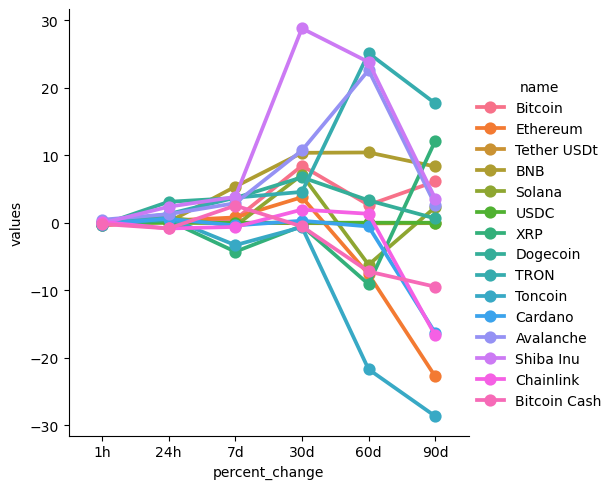

In [120]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [124]:
df8 = df2[['name','quote.USD.price','Timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,Timestamp
0,Bitcoin,61340.67115,2024-10-09 21:36:49.499759
15,Bitcoin,61340.67115,2024-10-09 21:37:10.575297
30,Bitcoin,60997.35332,2024-10-09 22:12:59.441533
45,Bitcoin,60986.16684,2024-10-09 22:14:23.051768
60,Bitcoin,62345.29397,2024-10-11 19:35:31.928674
75,Bitcoin,62797.61405,2024-10-11 20:45:20.709417


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

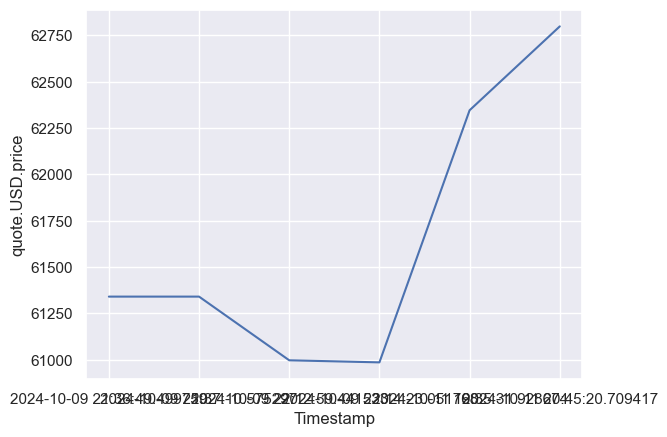

In [128]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='Timestamp', y='quote.USD.price', data = df8)

In [ ]:
pwd